
### <font color='blue'>Contexto</font>

**O diabetes** é uma das doenças crônicas com risco de vida que mais cresce e já afetou 422 milhões de pessoas em todo o mundo de acordo com o relatório da Organização Mundial da Saúde (OMS), em 2018. Devido à presença de uma fase assintomática relativamente longa, a deteção precoce do diabetes é sempre desejado para um resultado clinicamente significativo. Cerca de 50% de todas as pessoas que sofrem de diabetes não são diagnosticadas devido à sua fase assintomática de longo prazo.

Este conjunto de dados contém 520 observações com 17 características, coletadas usando questionários diretos e resultados de diagnósticos dos pacientes do Sylhet Diabetes Hospital em Sylhet, Bangladesh.


### <font color='blue'>Objectivo da Analise</font>


* **Criar um modelo de classificação para prever diabetes.**

* **Explorar as características mais comuns associadas ao risco diabético.**


### <font color='blue'>Descrição das Variaveis Preditoras</font>

* **Poliúria** - Se o paciente esta tendo um volume excessivo de urina
ou não.

* **Polidipsia** - Se o paciente esta tendo uma sede excessiva ou não.

* **Perda_peso_repentina**- Se o paciente teve um episódio de perda súbita de peso ou não.

* **Fraqueza**- Se o paciente teve um episódio de sensação de fraqueza.

* **Polifagia**- Se o paciente teve um episódio de fome excessiva/extrema ou não.

* **candidiase_genital**- Se o paciente teve uma infecção por fungos ou não.

* **desfoque_visual**- Se o paciente teve um episódio de visão turva.

* **coceira**- Se o paciente teve um episódio de coceira excessiva.

* **irritabilidade**- Se o paciente teve um episódio de irritabilidade.

* **cura_atrasada**- Se o paciente teve uma cura tardia notada quando ferido.

* **partial_paresis**- Se o paciente teve um episódio de enfraquecimento de um músculo/grupo de músculos ou não.

* **rigidez muscular**- Se o paciente teve um episódio de rigidez muscular.

* **calvície**- Se o paciente apresentou perda de cabelo ou não.

* **obesidade**- Se o paciente pode ser considerado obeso ou não usando seu índice de massa corporal.

* **Resultado** - se o paciente foi diagnosticado com diabetes ou nao, *1* corresponde *SIM* e 0 corresponde *NÃO*.


### <font color='blue'> Importando as bibliotecas que serão usadas na analise </font>

In [1]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import joblib
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix
from sklearn.metrics import accuracy_score
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler

Carregando os dados

In [2]:
df=pd.read_excel('diabete.xlsx')

In [3]:
df.head(10)

,id,idade,genero,poliúria,polidipsia,Perda_peso_repentina,fraqueza,polifagia,candidiase_genital,desfoque_visual,coceira,irritabilidade,cura_atrasada,partial_paresis,rigidez_muscular,calvicie,obesidade,Resultado
0,1,40,Masculino,Nao,Sim,Nao,Sim,Nao,Nao,Nao,Sim,Nao,Sim,Nao,Sim,Sim,Sim,1
1,2,58,Masculino,Nao,Nao,Nao,Sim,Nao,Nao,Sim,Nao,Nao,Nao,Sim,Nao,Sim,Nao,1
2,3,41,Masculino,Sim,Nao,Nao,Sim,Sim,Nao,Nao,Sim,Nao,Sim,Nao,Sim,Sim,Nao,1
3,4,45,Masculino,Nao,Nao,Sim,Sim,Sim,Sim,Nao,Sim,Nao,Sim,Nao,Nao,Nao,Nao,1
4,5,60,Masculino,Sim,Sim,Sim,Sim,Sim,Nao,Sim,Sim,Sim,Sim,Sim,Sim,Sim,Sim,1
5,6,55,Masculino,Sim,Sim,Nao,Sim,Sim,Nao,Sim,Sim,Nao,Sim,Nao,Sim,Sim,Sim,1
6,7,57,Masculino,Sim,Sim,Nao,Sim,Sim,Sim,Nao,Nao,Nao,Sim,Sim,Nao,Nao,Nao,1
7,8,66,Masculino,Sim,Sim,Sim,Sim,Nao,Nao,Sim,Sim,Sim,Nao,Sim,Sim,Nao,Nao,1
8,9,67,Masculino,Sim,Sim,Nao,Sim,Sim,Sim,Nao,Sim,Sim,Nao,Sim,Sim,Nao,Sim,1
9,10,70,Masculino,Nao,Sim,Sim,Sim,Sim,Nao,Sim,Sim,Sim,Nao,Nao,Nao,Sim,Nao,1


In [4]:
df.shape

(500, 18)

# <font color='blue'> Análise Exploratória de Dados </font>

In [5]:
df.dtypes

id                       int64
idade                    int64
genero                  object
poliúria                object
polidipsia              object
Perda_peso_repentina    object
fraqueza                object
polifagia               object
candidiase_genital      object
desfoque_visual         object
coceira                 object
irritabilidade          object
cura_atrasada           object
partial_paresis         object
rigidez_muscular        object
calvicie                object
obesidade               object
Resultado                int64
dtype: object

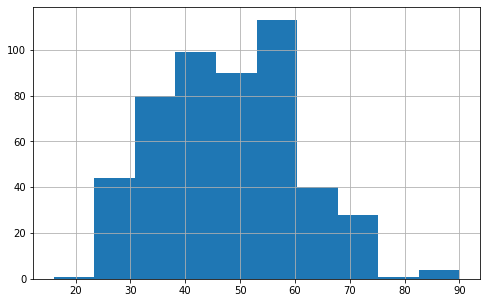

In [6]:
# Plot 
df['idade'].hist(figsize = (8,5), bins = 10) 
plt.show()

## Explorando as Variáveis Categóricas

In [7]:
df.describe(include = ['object'])

,genero,poliúria,polidipsia,Perda_peso_repentina,fraqueza,polifagia,candidiase_genital,desfoque_visual,coceira,irritabilidade,cura_atrasada,partial_paresis,rigidez_muscular,calvicie,obesidade
count,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,Masculino,Sim,Nao,Nao,Sim,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Nao
freq,314,251,272,290,296,270,386,273,256,376,269,283,310,329,415


## Colunas Categóricas x Variável Target(Resultado)

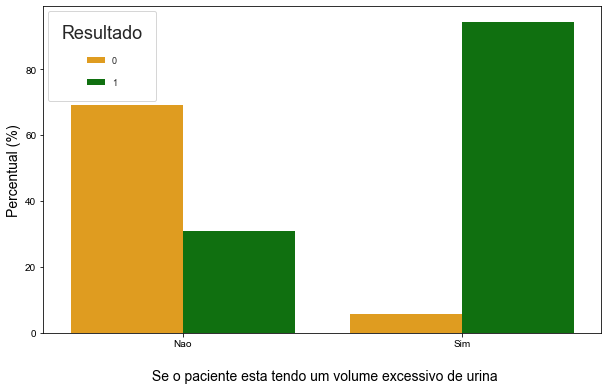

In [8]:
# Agrupamos os dados para análise
df_group1 = df.groupby(['Resultado', 'poliúria']).agg({'id' : 'nunique'}).reset_index()
df_group2 = df.groupby('poliúria').agg({'id' : 'nunique'}).reset_index() 
df_group3 = df_group1.merge(df_group2, on = 'poliúria')
df_group3['Percentual(%)'] = df_group3['id_x'] / df_group3['id_y'] * 100
df_group3.columns = ['Resultado de Diabetes', 
                     'Poliúria', 
                     'Total Por Resultado', 
                     'Total Geral', 
                     'Percentual(%)']
# Tamanho da figura
plt.figure(figsize = (10,6))

# Chart
chart = sns.barplot(x = 'Poliúria', 
                    y = 'Percentual(%)', 
                    data = df_group3, 
                    hue = 'Resultado de Diabetes',
                    palette = ["orange","green"])

# Estilo e labels
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
sns.set_palette('prism')
chart.set_xlabel("\n Se o paciente esta tendo um volume excessivo de urina", fontsize = 14)
chart.set_ylabel("Percentual (%)", fontsize = 14)

# Legenda
plt.legend(loc = 'upper left', 
           borderpad = 1.5, 
           labelspacing = 1.5, 
           fontsize = 9, 
           title = 'Resultado')

# Título
chart.text(x = -0.5, 
           y = 70, 
           s = "",
           fontsize = 25, 
           weight = 'bold', 
           alpha = .75)

# Sub-título
chart.text(x = -0.5, 
           y = 64,
           s = '',
           fontsize = 16, 
           alpha = .85);

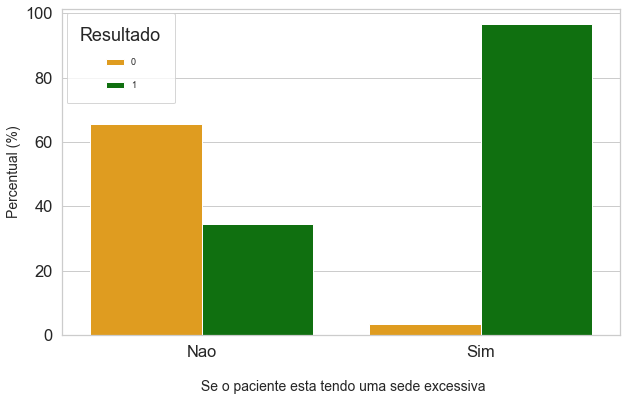

In [9]:
df_group4 = df.groupby(['Resultado', 'polidipsia']).agg({'id' : 'nunique'}).reset_index()
df_group5 = df.groupby('polidipsia').agg({'id' : 'nunique'}).reset_index() 
df_group6 = df_group4.merge(df_group5, on = 'polidipsia')
df_group6['Percentual(%)'] = df_group6['id_x'] / df_group6['id_y'] * 100
df_group6.columns = ['Resultado de Diabetes', 
                     'polidipsia', 
                     'Total Por Resultado', 
                     'Total Geral', 
                     'Percentual(%)']
# Tamanho da figura
plt.figure(figsize = (10,6))

# Chart
chart = sns.barplot(x = 'polidipsia', 
                    y = 'Percentual(%)', 
                    data = df_group6, 
                    hue = 'Resultado de Diabetes',
                    palette = ["orange","green"])

# Estilo e labels
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
sns.set_palette('prism')
chart.set_xlabel("\n Se o paciente esta tendo uma sede excessiva", fontsize = 14)
chart.set_ylabel("Percentual (%)", fontsize = 14)

# Legenda
plt.legend(loc = 'upper left', 
           borderpad = 1.5, 
           labelspacing = 1.5, 
           fontsize = 9, 
           title = 'Resultado')

# Título
chart.text(x = -0.5, 
           y = 70, 
           s = "",
           fontsize = 25, 
           weight = 'bold', 
           alpha = .75)

# Sub-título
chart.text(x = -0.5, 
           y = 64,
           s = '',
           fontsize = 16, 
           alpha = .85);


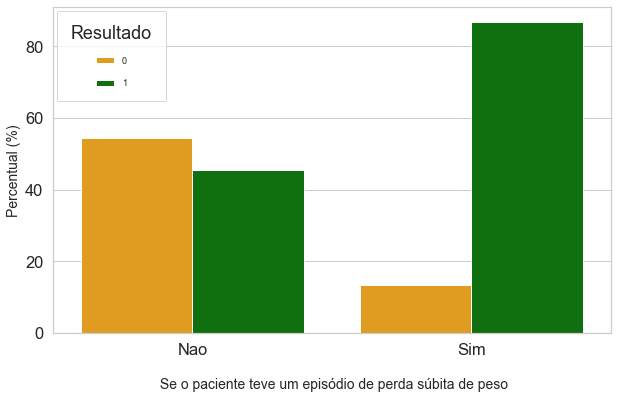

In [10]:
df_group7 = df.groupby(['Resultado', 'Perda_peso_repentina']).agg({'id' : 'nunique'}).reset_index()
df_group8 = df.groupby('Perda_peso_repentina').agg({'id' : 'nunique'}).reset_index() 
df_group9 = df_group7.merge(df_group8, on = 'Perda_peso_repentina')
df_group9['Percentual(%)'] = df_group9['id_x'] / df_group9['id_y'] * 100
df_group9.columns = ['Resultado de Diabetes', 
                     'Perda_peso_repentina', 
                     'Total Por Resultado', 
                     'Total Geral', 
                     'Percentual(%)']
# Tamanho da figura
plt.figure(figsize = (10,6))

# Chart
chart = sns.barplot(x = 'Perda_peso_repentina', 
                    y = 'Percentual(%)', 
                    data = df_group9, 
                    hue = 'Resultado de Diabetes',
                    palette = ["orange","green"])

# Estilo e labels
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
sns.set_palette('prism')
chart.set_xlabel("\n Se o paciente teve um episódio de perda súbita de peso", fontsize = 14)
chart.set_ylabel("Percentual (%)", fontsize = 14)

# Legenda
plt.legend(loc = 'upper left', 
           borderpad = 1.5, 
           labelspacing = 1.5, 
           fontsize = 9, 
           title = 'Resultado')

# Título
chart.text(x = -0.5, 
           y = 70, 
           s = "",
           fontsize = 25, 
           weight = 'bold', 
           alpha = .75)

# Sub-título
chart.text(x = -0.5, 
           y = 64,
           s = '',
           fontsize = 16, 
           alpha = .85);


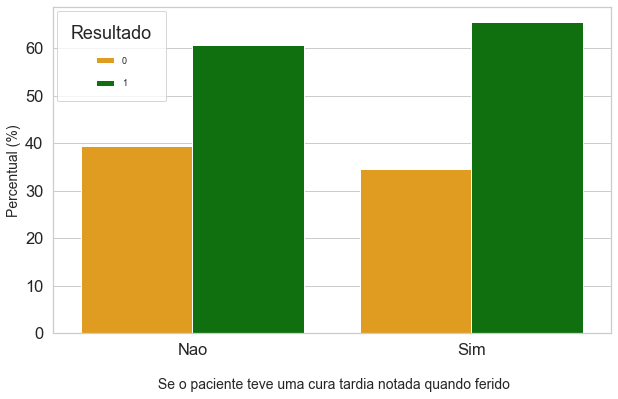

In [11]:
df_group10 = df.groupby(['Resultado', 'cura_atrasada']).agg({'id' : 'nunique'}).reset_index()
df_group11 = df.groupby('cura_atrasada').agg({'id' : 'nunique'}).reset_index() 
df_group12 = df_group10.merge(df_group11, on = 'cura_atrasada')
df_group12['Percentual(%)'] = df_group12['id_x'] / df_group12['id_y'] * 100
df_group12.columns = ['Resultado de Diabetes', 
                     'cura_atrasada', 
                     'Total Por Resultado', 
                     'Total Geral', 
                     'Percentual(%)']
# Tamanho da figura
plt.figure(figsize = (10,6))

# Chart
chart = sns.barplot(x = 'cura_atrasada', 
                    y = 'Percentual(%)', 
                    data = df_group12, 
                    hue = 'Resultado de Diabetes',
                    palette = ["orange","green"])

# Estilo e labels
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
sns.set_palette('prism')
chart.set_xlabel("\n Se o paciente teve uma cura tardia notada quando ferido", fontsize = 14)
chart.set_ylabel("Percentual (%)", fontsize = 14)

# Legenda
plt.legend(loc = 'upper left', 
           borderpad = 1.5, 
           labelspacing = 1.5, 
           fontsize = 9, 
           title = 'Resultado')

# Título
chart.text(x = -0.5, 
           y = 70, 
           s = "",
           fontsize = 25, 
           weight = 'bold', 
           alpha = .75)

# Sub-título
chart.text(x = -0.5, 
           y = 64,
           s = '',
           fontsize = 16, 
           alpha = .85);


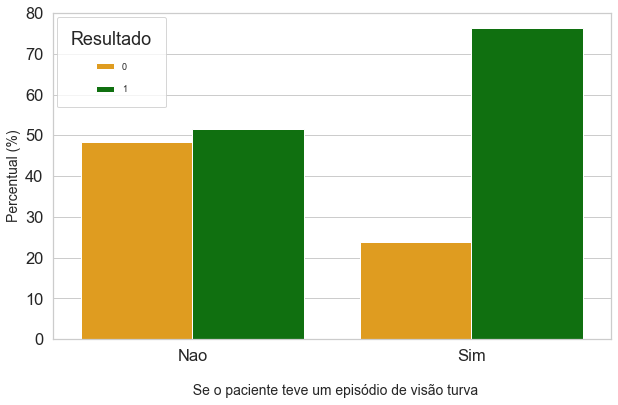

In [12]:
df_group13 = df.groupby(['Resultado', 'desfoque_visual']).agg({'id' : 'nunique'}).reset_index()
df_group14 = df.groupby('desfoque_visual').agg({'id' : 'nunique'}).reset_index() 
df_group15 = df_group13.merge(df_group14, on = 'desfoque_visual')
df_group15['Percentual(%)'] = df_group15['id_x'] / df_group15['id_y'] * 100
df_group15.columns = ['Resultado de Diabetes', 
                     'desfoque_visual', 
                     'Total Por Resultado', 
                     'Total Geral', 
                     'Percentual(%)']
# Tamanho da figura
plt.figure(figsize = (10,6))

# Chart
chart = sns.barplot(x = 'desfoque_visual', 
                    y = 'Percentual(%)', 
                    data = df_group15, 
                    hue = 'Resultado de Diabetes',
                    palette = ["orange","green"])

# Estilo e labels
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
sns.set_palette('prism')
chart.set_xlabel("\n  Se o paciente teve um episódio de visão turva", fontsize = 14)
chart.set_ylabel("Percentual (%)", fontsize = 14)

# Legenda
plt.legend(loc = 'upper left', 
           borderpad = 1.5, 
           labelspacing = 1.5, 
           fontsize = 9, 
           title = 'Resultado')

# Título
chart.text(x = -0.5, 
           y = 70, 
           s = "",
           fontsize = 25, 
           weight = 'bold', 
           alpha = .75)

# Sub-título
chart.text(x = -0.5, 
           y = 64,
           s = '',
           fontsize = 16, 
           alpha = .85);

In [13]:
df['Faixa_Etaria'] = np.where(
        (df['idade'] >= 16) & (df['idade'] < 36 ), "16-35", 
    np.where(
        (df['idade'] >= 36) & (df['idade'] < 51 ),"36-50", 
    np.where(
        (df['idade'] >= 51) &  (df['idade'] < 91 ), "51-90" , 'x')))

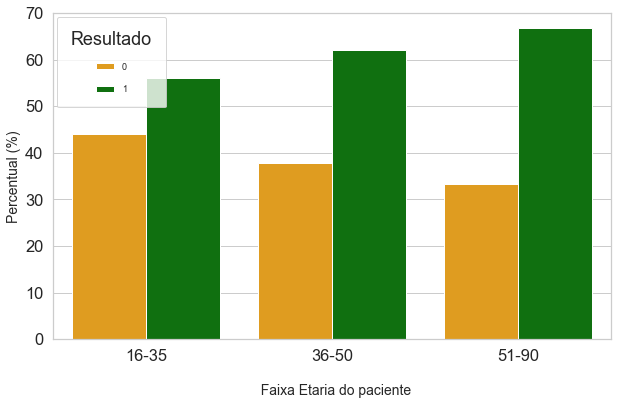

In [14]:
df_group16 = df.groupby(['Resultado', 'Faixa_Etaria']).agg({'id' : 'nunique'}).reset_index()
df_group17 = df.groupby('Faixa_Etaria').agg({'id' : 'nunique'}).reset_index() 
df_group18 = df_group16.merge(df_group17, on = 'Faixa_Etaria')
df_group18['Percentual(%)'] = df_group18['id_x'] / df_group18['id_y'] * 100
df_group18.columns = ['Resultado de Diabetes', 
                     'Faixa_Etaria', 
                     'Total Por Resultado', 
                     'Total Geral', 
                     'Percentual(%)']
# Tamanho da figura
plt.figure(figsize = (10,6))

# Chart
chart = sns.barplot(x = 'Faixa_Etaria', 
                    y = 'Percentual(%)', 
                    data = df_group18, 
                    hue = 'Resultado de Diabetes',
                    palette = ["orange","green"])

# Estilo e labels
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
sns.set_palette('prism')
chart.set_xlabel("\n  Faixa Etaria do paciente", fontsize = 14)
chart.set_ylabel("Percentual (%)", fontsize = 14)

# Legenda
plt.legend(loc = 'upper left', 
           borderpad = 1.5, 
           labelspacing = 1.5, 
           fontsize = 9, 
           title = 'Resultado')

# Título
chart.text(x = -0.5, 
           y = 70, 
           s = "",
           fontsize = 25, 
           weight = 'bold', 
           alpha = .75)

# Sub-título
chart.text(x = -0.5, 
           y = 64,
           s = '',
           fontsize = 16, 
           alpha = .85);

# Apartir dos graficos ilustrados acima podemos observar que:

* *89%* dos pacientes que apresentaram ter *um volume excessivo de urina* foram diagnosticado com diabete.
* *95%* dos pacientes que apresentaram ter *uma sede excessiva* foram diagnosticado com diabete.
* *84%* dos pacientes que apresentaram ter *episódio de perda súbita de peso* foram diagnosticado com diabete.
* *63%* dos pacientes que apresentaram ter *uma cura tardia notada quando ferido* foram diagnosticado com diabete.
* *75%* dos pacientes que apresentaram ter *um episódio de visão turva* foram diagnosticado com diabete.
* *68%* dos pacientes que estao na faixa etaria de *51-90* anos foram diagnosticado com diabete.
* *62%* dos pacientes que estao na faixa etaria de *36-50* anos foram diagnosticado com diabete.
* *55%* dos pacientes que estao na faixa etaria de *16-35* anos foram diagnosticado com diabete.

## <font color='blue'> Pré-Processamento de Dados Para Construção de Modelos de Machine Learning </font>


In [15]:
df.columns

Index(['id', 'idade', 'genero', 'poliúria', 'polidipsia',
       'Perda_peso_repentina', 'fraqueza', 'polifagia', 'candidiase_genital',
       'desfoque_visual', 'coceira', 'irritabilidade', 'cura_atrasada',
       'partial_paresis', 'rigidez_muscular', 'calvicie', 'obesidade',
       'Resultado', 'Faixa_Etaria'],
      dtype='object')

### Transformando os valores das variaveis categoricas para valores numericos

In [16]:
df['genero'] = np.where(
        (df['genero'] == 'Masculino'), 1, 
    np.where(
        (df['genero'] == 'Femenino'), 0 , 'x'))

In [17]:
df['poliúria'] = np.where(
        (df['poliúria'] == 'Sim'), 1, 
    np.where(
        (df['poliúria'] == 'Nao'), 0 , 'x'))

In [18]:
df['polidipsia'] = np.where(
        (df['polidipsia'] == 'Sim'), 1, 
    np.where(
        (df['polidipsia'] == 'Nao'), 0 , 'x'))

In [19]:
df['Perda_peso_repentina'] = np.where(
        (df['Perda_peso_repentina'] == 'Sim'), 1, 
    np.where(
        (df['Perda_peso_repentina'] == 'Nao'), 0 , 'x'))

In [20]:
df['fraqueza'] = np.where(
        (df['fraqueza'] == 'Sim'), 1, 
    np.where(
        (df['fraqueza'] == 'Nao'), 0 , 'x'))

In [21]:
df['polifagia'] = np.where(
        (df['polifagia'] == 'Sim'), 1, 
    np.where(
        (df['polifagia'] == 'Nao'), 0 , 'x'))

In [22]:
df['candidiase_genital'] = np.where(
        (df['candidiase_genital'] == 'Sim'), 1, 
    np.where(
        (df['candidiase_genital'] == 'Nao'), 0 , 'x'))

In [23]:
df['desfoque_visual'] = np.where(
        (df['desfoque_visual'] == 'Sim'), 1, 
    np.where(
        (df['desfoque_visual'] == 'Nao'), 0 , 'x'))

In [24]:
df['coceira'] = np.where(
        (df['coceira'] == 'Sim'), 1, 
    np.where(
        (df['coceira'] == 'Nao'), 0 , 'x'))

In [25]:
df['irritabilidade'] = np.where(
        (df['irritabilidade'] == 'Sim'), 1, 
    np.where(
        (df['irritabilidade'] == 'Nao'), 0 , 'x'))

In [26]:
df['cura_atrasada'] = np.where(
        (df['cura_atrasada'] == 'Sim'), 1, 
    np.where(
        (df['cura_atrasada'] == 'Nao'), 0 , 'x'))

In [27]:
df['partial_paresis'] = np.where(
        (df['partial_paresis'] == 'Sim'), 1, 
    np.where(
        (df['partial_paresis'] == 'Nao'), 0 , 'x'))

In [28]:
df['rigidez_muscular'] = np.where(
        (df['rigidez_muscular'] == 'Sim'), 1, 
    np.where(
        (df['rigidez_muscular'] == 'Nao'), 0 , 'x'))

In [29]:
df['calvicie'] = np.where(
        (df['calvicie'] == 'Sim'), 1, 
    np.where(
        (df['calvicie'] == 'Nao'), 0 , 'x'))

In [30]:
df['obesidade'] = np.where(
        (df['obesidade'] == 'Sim'), 1, 
    np.where(
        (df['obesidade'] == 'Nao'), 0 , 'x'))

In [31]:
df['genero'] = df['genero'].astype(int)
df['poliúria'] = df['poliúria'].astype(int)
df['polidipsia'] = df['polidipsia'].astype(int)
df['Perda_peso_repentina'] = df['Perda_peso_repentina'].astype(int)
df['fraqueza'] = df['fraqueza'].astype(int)
df['polifagia'] = df['polifagia'].astype(int)
df['candidiase_genital'] = df['candidiase_genital'].astype(int)
df['desfoque_visual'] = df['desfoque_visual'].astype(int)
df['coceira'] = df['coceira'].astype(int)
df['irritabilidade'] = df['irritabilidade'].astype(int)
df['cura_atrasada'] = df['cura_atrasada'].astype(int)
df['partial_paresis'] = df['partial_paresis'].astype(int)
df['rigidez_muscular'] = df['rigidez_muscular'].astype(int)
df['calvicie'] = df['calvicie'].astype(int)
df['obesidade'] = df['obesidade'].astype(int)

In [32]:
df.dtypes

id                       int64
idade                    int64
genero                   int32
poliúria                 int32
polidipsia               int32
Perda_peso_repentina     int32
fraqueza                 int32
polifagia                int32
candidiase_genital       int32
desfoque_visual          int32
coceira                  int32
irritabilidade           int32
cura_atrasada            int32
partial_paresis          int32
rigidez_muscular         int32
calvicie                 int32
obesidade                int32
Resultado                int64
Faixa_Etaria            object
dtype: object

# <font color='blue'> Feature Selection </font>

### Eliminando as variáveis que não serão usadas na criação do Modelo preditivo

In [33]:
df = df.drop('id', axis = 1)

In [34]:
df = df.drop('Faixa_Etaria', axis = 1)

In [35]:
df.head(10)

,idade,genero,poliúria,polidipsia,Perda_peso_repentina,fraqueza,polifagia,candidiase_genital,desfoque_visual,coceira,irritabilidade,cura_atrasada,partial_paresis,rigidez_muscular,calvicie,obesidade,Resultado
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
5,55,1,1,1,0,1,1,0,1,1,0,1,0,1,1,1,1
6,57,1,1,1,0,1,1,1,0,0,0,1,1,0,0,0,1
7,66,1,1,1,1,1,0,0,1,1,1,0,1,1,0,0,1
8,67,1,1,1,0,1,1,1,0,1,1,0,1,1,0,1,1
9,70,1,0,1,1,1,1,0,1,1,1,0,0,0,1,0,1


### <font color='blue'> Divisão dos dados em Treino e Teste </font>

In [36]:
# Cria um objeto separado para a variável target
y = df.Resultado

In [37]:
# Cria um objeto separadado para as variáveis de entrada
X = df.drop('Resultado', axis = 1)

In [38]:
# Split em dados de treino e teste com amostragem estratificada
X_treino, X_teste, y_treino, y_teste = train_test_split(X, 
                                                        y, 
                                                        test_size = 0.25, 
                                                        random_state = 1234,
                                                        stratify = df.Resultado)

In [39]:
len(X_treino)

375

In [40]:
len(X_teste)

125

In [41]:
# Print do shape
print(X_treino.shape, X_teste.shape, y_treino.shape, y_teste.shape)

(375, 16) (125, 16) (375,) (125,)


In [42]:
y_treino.value_counts()

1    235
0    140
Name: Resultado, dtype: int64

### <font color='blue'> Padronização dos Dados </font>

In [43]:
X_treino.head()

,idade,genero,poliúria,polidipsia,Perda_peso_repentina,fraqueza,polifagia,candidiase_genital,desfoque_visual,coceira,irritabilidade,cura_atrasada,partial_paresis,rigidez_muscular,calvicie,obesidade
271,57,1,1,1,1,1,1,0,1,0,0,0,1,0,0,0
469,47,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
385,38,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1
392,56,1,0,0,1,1,1,0,1,1,0,1,0,1,1,0
204,30,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Calculamos média e desvio padrão dos dados de treino

In [44]:
treino_mean = X_treino.mean()
treino_std = X_treino.std()
print(treino_mean)
print(treino_std)

idade                   47.557333
genero                   0.621333
poliúria                 0.506667
polidipsia               0.456000
Perda_peso_repentina     0.408000
fraqueza                 0.592000
polifagia                0.445333
candidiase_genital       0.208000
desfoque_visual          0.461333
coceira                  0.469333
irritabilidade           0.245333
cura_atrasada            0.437333
partial_paresis          0.442667
rigidez_muscular         0.378667
calvicie                 0.344000
obesidade                0.176000
dtype: float64
idade                   11.931457
genero                   0.485703
poliúria                 0.500623
polidipsia               0.498726
Perda_peso_repentina     0.492120
fraqueza                 0.492120
polifagia                0.497667
candidiase_genital       0.406419
desfoque_visual          0.499169
coceira                  0.499725
irritabilidade           0.430860
cura_atrasada            0.496720
partial_paresis          0.497366

### Padronização: Colocando os dados na mesma escala

In [45]:
X_treino = (X_treino - treino_mean) / treino_std

In [46]:
X_treino.head()

,idade,genero,poliúria,polidipsia,Perda_peso_repentina,fraqueza,polifagia,candidiase_genital,desfoque_visual,coceira,irritabilidade,cura_atrasada,partial_paresis,rigidez_muscular,calvicie,obesidade
271,0.791409,0.779626,0.985438,1.09078,1.202959,0.829067,1.114535,-0.511787,1.079128,-0.939182,-0.569404,-0.880442,1.120571,-0.779626,-0.723182,-0.461544
469,-0.046711,0.779626,-1.012071,-0.91433,-0.829067,-1.202959,-0.894843,-0.511787,-0.924203,1.061917,-0.569404,-0.880442,-0.890023,-0.779626,1.379091,-0.461544
385,-0.801020,0.779626,0.985438,-0.91433,-0.829067,-1.202959,-0.894843,1.948727,-0.924203,1.061917,-0.569404,-0.880442,-0.890023,1.279246,-0.723182,2.160864
392,0.707597,0.779626,-1.012071,-0.91433,1.202959,0.829067,1.114535,-0.511787,1.079128,1.061917,-0.569404,1.132764,-0.890023,1.279246,1.379091,-0.461544
204,-1.471516,0.779626,-1.012071,-0.91433,-0.829067,-1.202959,-0.894843,-0.511787,-0.924203,-0.939182,-0.569404,-0.880442,-0.890023,-0.779626,-0.723182,-0.461544


In [47]:
X_treino.describe()

,idade,genero,poliúria,polidipsia,Perda_peso_repentina,fraqueza,polifagia,candidiase_genital,desfoque_visual,coceira,irritabilidade,cura_atrasada,partial_paresis,rigidez_muscular,calvicie,obesidade
count,3.750000e+02,3.750000e+02,3.750000e+02,3.750000e+02,3.750000e+02,3.750000e+02,3.750000e+02,3.750000e+02,3.750000e+02,3.750000e+02,3.750000e+02,3.750000e+02,3.750000e+02,3.750000e+02,3.750000e+02,3.750000e+02
mean,9.000208e-17,7.401487e-17,-1.382598e-16,-6.987004e-17,1.622406e-16,-2.427688e-17,4.766558e-17,-1.894781e-17,2.948752e-16,-1.065814e-17,-1.480297e-18,-9.621933e-17,1.693460e-16,-1.373716e-16,-4.440892e-17,-1.435888e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.644885e+00,-1.279246e+00,-1.012071e+00,-9.143304e-01,-8.290666e-01,-1.202959e+00,-8.948428e-01,-5.117870e-01,-9.242033e-01,-9.391824e-01,-5.694045e-01,-8.804422e-01,-8.900227e-01,-7.796261e-01,-7.231818e-01,-4.615438e-01
25%,-7.172077e-01,-1.279246e+00,-1.012071e+00,-9.143304e-01,-8.290666e-01,-1.202959e+00,-8.948428e-01,-5.117870e-01,-9.242033e-01,-9.391824e-01,-5.694045e-01,-8.804422e-01,-8.900227e-01,-7.796261e-01,-7.231818e-01,-4.615438e-01
50%,-4.671125e-02,7.796261e-01,9.854378e-01,-9.143304e-01,-8.290666e-01,8.290666e-01,-8.948428e-01,-5.117870e-01,-9.242033e-01,-9.391824e-01,-5.694045e-01,-8.804422e-01,-8.900227e-01,-7.796261e-01,-7.231818e-01,-4.615438e-01
75%,6.237852e-01,7.796261e-01,9.854378e-01,1.090780e+00,1.202959e+00,8.290666e-01,1.114535e+00,-5.117870e-01,1.079128e+00,1.061917e+00,-5.694045e-01,1.132764e+00,1.120571e+00,1.279246e+00,1.379091e+00,-4.615438e-01
max,3.557207e+00,7.796261e-01,9.854378e-01,1.090780e+00,1.202959e+00,8.290666e-01,1.114535e+00,1.948727e+00,1.079128e+00,1.061917e+00,1.751538e+00,1.132764e+00,1.120571e+00,1.279246e+00,1.379091e+00,2.160864e+00


In [48]:
X_teste = (X_teste - treino_mean) / treino_std

In [49]:
X_teste.head()

,idade,genero,poliúria,polidipsia,Perda_peso_repentina,fraqueza,polifagia,candidiase_genital,desfoque_visual,coceira,irritabilidade,cura_atrasada,partial_paresis,rigidez_muscular,calvicie,obesidade
308,-1.136268,0.779626,-1.012071,-0.91433,-0.829067,-1.202959,-0.894843,-0.511787,-0.924203,-0.939182,-0.569404,-0.880442,-0.890023,-0.779626,-0.723182,-0.461544
322,1.378094,0.779626,-1.012071,-0.91433,-0.829067,0.829067,1.114535,-0.511787,1.079128,1.061917,1.751538,1.132764,-0.890023,1.279246,1.379091,-0.461544
3,-0.214335,0.779626,-1.012071,-0.91433,1.202959,0.829067,1.114535,1.948727,-0.924203,1.061917,-0.569404,1.132764,-0.890023,-0.779626,-0.723182,-0.461544
313,0.539973,0.779626,-1.012071,-0.91433,1.202959,0.829067,-0.894843,1.948727,-0.924203,-0.939182,-0.569404,1.132764,-0.890023,-0.779626,1.379091,-0.461544
461,-0.214335,0.779626,-1.012071,-0.91433,-0.829067,-1.202959,1.114535,1.948727,-0.924203,-0.939182,-0.569404,-0.880442,-0.890023,-0.779626,-0.723182,-0.461544


### <font color='blue'> Construção, Treinamento e Avaliação do Modelo 1 com Regressão Logística (Benchmark) </font>

Para a primeira versão do modelo o ideal é escolher um algoritmo simples, fácil de compreender e que será usado como Benchmark.

Define lista de hiperparâmetros

In [50]:
tuned_params_v1 = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], 
                   'penalty': ['l1', 'l2']}

 Criaremos o modelo com GridSearch, Vários modelos serão criados com diferentes combinações de hiperparâmetros

In [51]:
modelo_v1 = GridSearchCV(LogisticRegression(), 
                         tuned_params_v1, 
                         scoring = 'roc_auc', 
                         n_jobs = -1)

Treinamento do modelo

In [52]:
modelo_v1.fit(X_treino, y_treino)

GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                               10000],
                         'penalty': ['l1', 'l2']},
             scoring='roc_auc')

Selecionamos o melhor modelo

In [53]:
modelo_v1.best_estimator_

LogisticRegression(C=0.1)

Previsões com dados de teste

In [54]:
y_pred_v1 = modelo_v1.predict(X_teste)

Mostra as 10 primeiras previsões

In [55]:
y_pred_v1[:10]

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 1], dtype=int64)

Obtemos as previsões no formato de probabilidade para cada classe

In [56]:
y_pred_proba_v1 = modelo_v1.predict_proba(X_teste)

Mostra as 10 primeiras previsões

In [57]:
y_pred_proba_v1[:10]

array([[0.8792223 , 0.1207777 ],
       [0.86815056, 0.13184944],
       [0.73761874, 0.26238126],
       [0.80163337, 0.19836663],
       [0.58877337, 0.41122663],
       [0.96667096, 0.03332904],
       [0.00804371, 0.99195629],
       [0.96335072, 0.03664928],
       [0.26310302, 0.73689698],
       [0.02474842, 0.97525158]])

Obtemos as previsões no formato de probabilidade filtrando para a classe positiva, 
Precisamos disso para calcula a Curva ROC

In [58]:
y_pred_proba_v1 = modelo_v1.predict_proba(X_teste)[:,1]

Mostra as 10 primeiras previsões

In [59]:
y_pred_proba_v1[:10]

array([0.1207777 , 0.13184944, 0.26238126, 0.19836663, 0.41122663,
       0.03332904, 0.99195629, 0.03664928, 0.73689698, 0.97525158])

Como exemplo, vamos verificar um dos pontos de dados

In [60]:
 i = 16 
print('Para o ponto de dado {}, classe real = {}, classe prevista = {}, probabilidade prevista = {}'.
      format(i, y_teste.iloc[i], y_pred_v1[i], y_pred_proba_v1[i]))

Para o ponto de dado 16, classe real = 1, classe prevista = 1, probabilidade prevista = 0.5488443360614403


Matriz de confusão

In [61]:
confusion_matrix(y_teste, y_pred_v1)

array([[45,  1],
       [ 8, 71]], dtype=int64)

Extraindo cada valor da CM

In [62]:
tn, fp, fn, tp = confusion_matrix(y_teste, y_pred_v1).ravel()

In [63]:
print(tn, fp, fn, tp)

45 1 8 71


Calcula a métrica global AUC (Area Under The Curve) com dados reais e previsões em teste

In [64]:
roc_auc_v1 = roc_auc_score(y_teste, y_pred_v1)
print(roc_auc_v1)

0.9384975233902036


Calcula a curva ROC com dados e previsões em teste

In [65]:
fpr_v1, tpr_v1, thresholds = roc_curve(y_teste, y_pred_proba_v1)

AUC em teste

In [66]:
auc_v1 = auc(fpr_v1, tpr_v1)
print(auc_v1)

0.9518436984039627


Acurácia em teste

In [67]:
acuracia_v1 = accuracy_score(y_teste, y_pred_v1)
print(acuracia_v1)

0.928


### Feature Importance

Construindo o modelo novamente com os melhores hiperparâmetros, Isso é necessário pois a versão final não deve ter o GridSearchCV

In [68]:
modelo_v1 = LogisticRegression(C = 1)
modelo_v1.fit(X_treino, y_treino)

LogisticRegression(C=1)

Obtemos os coeficientes pelo maior usando np.argsort

In [69]:
indices = np.argsort(-abs(modelo_v1.coef_[0,:]))

In [70]:
print("Variáveis mais importantes para o resultado do modelo_v1:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

Variáveis mais importantes para o resultado do modelo_v1:
--------------------------------------------------
polidipsia
genero
poliúria
irritabilidade
coceira
candidiase_genital
cura_atrasada
desfoque_visual
partial_paresis
polifagia
Perda_peso_repentina
idade
calvicie
rigidez_muscular
obesidade
fraqueza


Salvando o modelo em disco

In [71]:
with open('modelos/modelo_v1.pkl', 'wb') as pickle_file:
      joblib.dump(modelo_v1, 'modelos/modelo_v1.pkl') 

Cria um dataframe para receber as métricas de cada modelo

In [72]:
df_modelos = pd.DataFrame()

Dicionário com as métricas do modelo_v1

In [73]:
dict_modelo_v1 = {'Nome': 'modelo_v1', 
                  'Algoritmo': 'Regressão Logística', 
                  'ROC_AUC Score': roc_auc_v1,
                  'AUC Score': auc_v1,
                  'Acurácia': acuracia_v1}

Adiciona o dict ao dataframe

In [74]:
df_modelos = df_modelos.append(dict_modelo_v1, ignore_index = True)

In [75]:
display(df_modelos)

,Nome,Algoritmo,ROC_AUC Score,AUC Score,Acurácia
0,modelo_v1,Regressão Logística,0.938498,0.951844,0.928


### <font color='blue'> Construção, Treinamento e Avaliação do Modelo 2 com Random Forest </font>

O objectivo agora é tentar obter um modelo melhor que a versão 1. Irei tentar o algoritmo Random Forest.

Grid de hiperparâmetros

In [76]:
tuned_params_v2 = {'n_estimators': [100, 200, 300, 400, 500], 
                   'min_samples_split': [2, 5, 10], 
                   'min_samples_leaf': [1, 2, 4]}

Cria o modelo com RandomizedSearchCV para buscar a melhor combinação de hiperparâmetros

In [77]:
modelo_v2 = RandomizedSearchCV(RandomForestClassifier(), 
                               tuned_params_v2, 
                               n_iter = 15, 
                               scoring = 'roc_auc', 
                               n_jobs  = -1)

Treina o modelo

In [ ]:
modelo_v2.fit(X_treino, y_treino)

In [ ]:
modelo_v2.best_estimator_

In [ ]:
y_pred_v2 = modelo_v2.predict(X_teste)

In [ ]:
y_pred_proba_v2 = modelo_v2.predict_proba(X_teste)[:,1]

In [ ]:
confusion_matrix(y_teste, y_pred_v2)

In [ ]:
roc_auc_v2 = roc_auc_score(y_teste, y_pred_v2)
print(roc_auc_v2)

In [ ]:
fpr_v2, tpr_v2, thresholds = roc_curve(y_teste, y_pred_proba_v2)

In [ ]:
auc_v2 = auc(fpr_v2, tpr_v2)
print(auc_v2)

In [ ]:
acuracia_v2 = accuracy_score(y_teste, y_pred_v2)
print(acuracia_v2)

### Feature Importance

In [ ]:
modelo_v2 = RandomForestClassifier(n_estimators = 200, min_samples_split = 5, min_samples_leaf = 4)
modelo_v2.fit(X_treino, y_treino)

In [ ]:
indices = np.argsort(-modelo_v2.feature_importances_)
print("Variáveis mais importantes para o resultado do modelo_v2:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

Salvando o modelo em disco

In [ ]:
with open('modelos/modelo_v2.pkl', 'wb') as pickle_file:
      joblib.dump(modelo_v2, 'modelos/modelo_v2.pkl') 

In [ ]:
dict_modelo_v2 = {'Nome': 'modelo_v2', 
                  'Algoritmo': 'Random Forest', 
                  'ROC_AUC Score': roc_auc_v2,
                  'AUC Score': auc_v2,
                  'Acurácia': acuracia_v2}

In [ ]:
df_modelos = df_modelos.append(dict_modelo_v2, ignore_index = True)

In [ ]:
display(df_modelos)

### <font color='blue'> Construção, Treinamento e Avaliação do Modelo 3 com KNN </font>

Agora vou tentar um algoritmo mais simples, o KNN. Para esse algoritmo preciso antes definir o valor de K, que é o número de vizinhos mais próximos.

Lista de possíveis valores de K-visinhos

In [ ]:
vizinhos = list(range(1, 20, 2))

Lista para os scores

In [ ]:
cv_scores = []

Validação cruzada para determinar o melhor valor de k

In [ ]:
for k in vizinhos:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X_treino, y_treino, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())  

Ajustando o erro de classificação

In [ ]:
erro = [1 - x for x in cv_scores]

Determinando o melhor valor de k (com menor erro)

In [ ]:
optimal_k = vizinhos[erro.index(min(erro))]
print('O valor ideal de k é %d' % optimal_k)

Criando o modelo versão 3

In [ ]:
modelo_v3 = KNeighborsClassifier(n_neighbors = optimal_k)

Treinamento

In [ ]:
modelo_v3.fit(X_treino, y_treino)

Previsões

In [ ]:
y_pred_v3 = modelo_v3.predict(X_teste)

In [ ]:
confusion_matrix(y_teste, y_pred_v3)

In [ ]:
y_pred_proba_v3 = modelo_v3.predict_proba(X_teste)[:,1]

In [ ]:
roc_auc_v3 = roc_auc_score(y_teste, y_pred_v3)
print(roc_auc_v3)

In [ ]:
fpr_v3, tpr_v3, thresholds = roc_curve(y_teste, y_pred_proba_v3)

In [ ]:
auc_v3 = auc(fpr_v3, tpr_v3)
print(auc_v3)

In [ ]:
acuracia_v3 = accuracy_score(y_teste, y_pred_v3)
print(acuracia_v3)

Obs: Com o algoritmo KNN não extraímos as variáveis mais importantes, pois o conceito do algoritmo é diferente.

Salvando o modelo em disco

In [ ]:
with open('modelos/modelo_v3.pkl', 'wb') as pickle_file:
      joblib.dump(modelo_v3, 'modelos/modelo_v3.pkl') 

In [ ]:
dict_modelo_v3 = {'Nome': 'modelo_v3', 
                  'Algoritmo': 'KNN', 
                  'ROC_AUC Score': roc_auc_v3,
                  'AUC Score': auc_v3,
                  'Acurácia': acuracia_v3}

In [ ]:
df_modelos = df_modelos.append(dict_modelo_v3, ignore_index = True)

In [ ]:
display(df_modelos)

### <font color='blue'> Construção, Treinamento e Avaliação do Modelo 4 com Decision Tree </font>

Na versão 4 do modelo usarei um modelo de árvore de decisão.

Hiperparâmetros

In [ ]:
tuned_params_v4 = {'min_samples_split': [2, 3, 4, 5, 7], 
                   'min_samples_leaf': [1, 2, 3, 4, 6], 
                   'max_depth': [2, 3, 4, 5, 6, 7]}

Cria o modelo com RandomizedSearchCV

In [ ]:
modelo_v4 = RandomizedSearchCV(DecisionTreeClassifier(), 
                               tuned_params_v4, 
                               n_iter = 15, 
                               scoring = 'roc_auc', 
                               n_jobs = -1)

Treinamento

In [ ]:
modelo_v4.fit(X_treino, y_treino)

In [ ]:
modelo_v4.best_estimator_

In [ ]:
y_pred_v4 = modelo_v4.predict(X_teste)

In [ ]:
y_pred_proba_v4 = modelo_v4.predict_proba(X_teste)[:,1]

In [ ]:
confusion_matrix(y_teste, y_pred_v4)

In [ ]:
roc_auc_v4 = roc_auc_score(y_teste, y_pred_v4)
print(roc_auc_v4)

In [ ]:
fpr_v4, tpr_v4, thresholds = roc_curve(y_teste, y_pred_proba_v4)

In [ ]:
auc_v4 = auc(fpr_v4, tpr_v4)
print(auc_v4)

In [ ]:
acuracia_v4 = accuracy_score(y_teste, y_pred_v4)
print(acuracia_v4)

### Feature Importance

Recriando o modelo

In [ ]:
modelo_v4 = DecisionTreeClassifier(min_samples_split = 2, min_samples_leaf = 6, max_depth = 4)
modelo_v4.fit(X_treino, y_treino)

In [ ]:
indices = np.argsort(-modelo_v4.feature_importances_)
print("Variáveis mais importantes para o resultado do modelo_v4:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

Salvando o modelo em disco

In [ ]:
with open('modelos/modelo_v4.pkl', 'wb') as pickle_file:
      joblib.dump(modelo_v4, 'modelos/modelo_v4.pkl') 

In [ ]:
dict_modelo_v4 = {'Nome': 'modelo_v4', 
                  'Algoritmo': 'Decision Tree', 
                  'ROC_AUC Score': roc_auc_v4,
                  'AUC Score': auc_v4,
                  'Acurácia': acuracia_v4}

In [ ]:
df_modelos = df_modelos.append(dict_modelo_v4, ignore_index = True)

In [ ]:
display(df_modelos)

### <font color='blue'> Construção, Treinamento e Avaliação do Modelo 5 com SVM </font>

Para a quinta e última versão do modelo usarei SVM.

Função para seleção de hiperparâmetros

In [ ]:
def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(SVC(kernel = 'rbf'), param_grid, cv = nfolds)
    grid_search.fit(X_treino, y_treino)
    grid_search.best_params_
    return grid_search.best_params_

Aplica a função

In [ ]:
svc_param_selection(X_treino, y_treino, 5)

Cria o modelo com os melhores hiperparâmetros

In [ ]:
modelo_v5 = SVC(C = 1, gamma = 1, probability = True)

Treinamento

In [ ]:
modelo_v5.fit(X_treino, y_treino)

In [ ]:
y_pred_v5 = modelo_v5.predict(X_teste)

In [ ]:
confusion_matrix(y_teste, y_pred_v5)

In [ ]:
y_pred_proba_v5 = modelo_v5.predict_proba(X_teste)[:, 1]

In [ ]:
roc_auc_v5 = roc_auc_score(y_teste, y_pred_v5)
print(roc_auc_v5)

In [ ]:
fpr_v5, tpr_v5, thresholds = roc_curve(y_teste, y_pred_proba_v5)

In [ ]:
auc_v5 = auc(fpr_v5, tpr_v5)
print(auc_v5)

In [ ]:
acuracia_v5 = accuracy_score(y_teste, y_pred_v5)
print(acuracia_v5)

Salvando o modelo em disco

In [ ]:
with open('modelos/modelo_v5.pkl', 'wb') as pickle_file:
      joblib.dump(modelo_v5, 'modelos/modelo_v5.pkl') 

In [ ]:
dict_modelo_v5 = {'Nome': 'modelo_v5', 
                  'Algoritmo': 'SVM', 
                  'ROC_AUC Score': roc_auc_v5,
                  'AUC Score': auc_v5,
                  'Acurácia': acuracia_v5}

In [ ]:
df_modelos = df_modelos.append(dict_modelo_v5, ignore_index = True)

In [ ]:
display(df_modelos)

### <font color='blue'> Seleção do Melhor Modelo </font>

Usarei o modelo que teve o maior Acurácia, por se tratar de uma métrica global,
Acurácia é o ideal para comparar modelos de diferentes algoritmos

In [ ]:
df_melhor_modelo = df_modelos[df_modelos['Acurácia'] == df_modelos['Acurácia'].max()]

In [ ]:
df_melhor_modelo

## <font color='blue'> Previsões com o Melhor Modelo Treinado </font>

Obtem o nome do melhor modelo

In [ ]:
modelo = df_melhor_modelo.Nome.to_string(index = False)
modelo

Carrega o melhor modelo do disco

In [ ]:
melhor_modelo = joblib.load('modelos/' + modelo + '.pkl')
melhor_modelo

In [ ]:
df.columns

# <font color='blue'> Previsão de Diabetes com dados de Novos Pacientes </font>

* A seguir será carregado o dataset denominado *teste* que contem dados de 20 novos pacientes, que apresentaram as 14 características que serão usadas para diagnosticar se o paciente tem diabetes ou não.
* Obs: neste novo dataset não teremos a coluna *Resultado*  que mostra o diagnostico do paciente, Será  responsabilidade do melhor modelo preditivo criado, prever o resultado do diagnostico do paciente consoante os sintomas que cada paciente apresentar.

    

## Carregando o Dataset usado para Previsão

In [ ]:
Novos_Pacientes = pd.read_excel('teste.xlsx')

In [ ]:
Pacientes = pd.read_excel('teste.xlsx')

## Pré-Processamento de Dados de Novos Pacientes para Previsão

In [ ]:
Novos_Pacientes['genero'] = np.where(
        (Novos_Pacientes['genero'] == 'Masculino'), 1, 
    np.where(
        (Novos_Pacientes['genero'] == 'Femenino'), 0 , 'x'))

In [ ]:
Novos_Pacientes['poliúria'] = np.where(
        (Novos_Pacientes['poliúria'] == 'Sim'), 1, 
    np.where(
        (Novos_Pacientes['poliúria'] == 'Nao'), 0 , 'x'))

In [ ]:
Novos_Pacientes['polidipsia'] = np.where(
        (Novos_Pacientes['polidipsia'] == 'Sim'), 1, 
    np.where(
        (Novos_Pacientes['polidipsia'] == 'Nao'), 0 , 'x'))

In [ ]:
Novos_Pacientes['Perda_peso_repentina'] = np.where(
        (Novos_Pacientes['Perda_peso_repentina'] == 'Sim'), 1, 
    np.where(
        (Novos_Pacientes['Perda_peso_repentina'] == 'Nao'), 0 , 'x'))

In [ ]:
Novos_Pacientes['fraqueza'] = np.where(
        (Novos_Pacientes['fraqueza'] == 'Sim'), 1, 
    np.where(
        (Novos_Pacientes['fraqueza'] == 'Nao'), 0 , 'x'))

In [ ]:
Novos_Pacientes['polifagia'] = np.where(
        (Novos_Pacientes['polifagia'] == 'Sim'), 1, 
    np.where(
        (Novos_Pacientes['polifagia'] == 'Nao'), 0 , 'x'))

In [ ]:
Novos_Pacientes['candidiase_genital'] = np.where(
        (Novos_Pacientes['candidiase_genital'] == 'Sim'), 1, 
    np.where(
        (Novos_Pacientes['candidiase_genital'] == 'Nao'), 0 , 'x'))

In [ ]:
Novos_Pacientes['desfoque_visual'] = np.where(
        (Novos_Pacientes['desfoque_visual'] == 'Sim'), 1, 
    np.where(
        (Novos_Pacientes['desfoque_visual'] == 'Nao'), 0 , 'x'))

In [ ]:
Novos_Pacientes['coceira'] = np.where(
        (Novos_Pacientes['coceira'] == 'Sim'), 1, 
    np.where(
        (Novos_Pacientes['coceira'] == 'Nao'), 0 , 'x'))

In [ ]:
Novos_Pacientes['irritabilidade'] = np.where(
        (Novos_Pacientes['irritabilidade'] == 'Sim'), 1, 
    np.where(
        (Novos_Pacientes['irritabilidade'] == 'Nao'), 0 , 'x'))

In [ ]:
Novos_Pacientes['cura_atrasada'] = np.where(
        (Novos_Pacientes['cura_atrasada'] == 'Sim'), 1, 
    np.where(
        (Novos_Pacientes['cura_atrasada'] == 'Nao'), 0 , 'x'))

In [ ]:
Novos_Pacientes['partial_paresis'] = np.where(
        (Novos_Pacientes['partial_paresis'] == 'Sim'), 1, 
    np.where(
        (Novos_Pacientes['partial_paresis'] == 'Nao'), 0 , 'x'))

In [ ]:
Novos_Pacientes['rigidez_muscular'] = np.where(
        (Novos_Pacientes['rigidez_muscular'] == 'Sim'), 1, 
    np.where(
        (Novos_Pacientes['rigidez_muscular'] == 'Nao'), 0 , 'x'))

In [ ]:
Novos_Pacientes['calvicie'] = np.where(
        (Novos_Pacientes['calvicie'] == 'Sim'), 1, 
    np.where(
        (Novos_Pacientes['calvicie'] == 'Nao'), 0 , 'x'))

In [ ]:
Novos_Pacientes['obesidade'] = np.where(
        (Novos_Pacientes['obesidade'] == 'Sim'), 1, 
    np.where(
        (Novos_Pacientes['obesidade'] == 'Nao'), 0 , 'x'))

In [ ]:
Novos_Pacientes['genero'] = Novos_Pacientes['genero'].astype(int)
Novos_Pacientes['poliúria'] = Novos_Pacientes['poliúria'].astype(int)
Novos_Pacientes['polidipsia'] = Novos_Pacientes['polidipsia'].astype(int)
Novos_Pacientes['Perda_peso_repentina'] = Novos_Pacientes['Perda_peso_repentina'].astype(int)
Novos_Pacientes['fraqueza'] = Novos_Pacientes['fraqueza'].astype(int)
Novos_Pacientes['polifagia'] = Novos_Pacientes['polifagia'].astype(int)
Novos_Pacientes['candidiase_genital'] = Novos_Pacientes['candidiase_genital'].astype(int)
Novos_Pacientes['desfoque_visual'] = Novos_Pacientes['desfoque_visual'].astype(int)
Novos_Pacientes['coceira'] = Novos_Pacientes['coceira'].astype(int)
Novos_Pacientes['irritabilidade'] = Novos_Pacientes['irritabilidade'].astype(int)
Novos_Pacientes['cura_atrasada'] = Novos_Pacientes['cura_atrasada'].astype(int)
Novos_Pacientes['partial_paresis'] = Novos_Pacientes['partial_paresis'].astype(int)
Novos_Pacientes['rigidez_muscular'] = Novos_Pacientes['rigidez_muscular'].astype(int)
Novos_Pacientes['calvicie'] = Novos_Pacientes['calvicie'].astype(int)
Novos_Pacientes['obesidade'] = Novos_Pacientes['obesidade'].astype(int)

In [ ]:
Novos_Pacientes.head(5)

In [ ]:
Novos_Pacientes.dtypes

In [ ]:
Novos_Pacientes = (Novos_Pacientes - treino_mean) / treino_std

In [ ]:
Novos_Pacientes.head(10)

## <font color='blue'> Deploy do Modelo- Colocando o Modelo em Produção </font>

In [ ]:
Novos_pacientes_prev =  melhor_modelo.predict(Novos_Pacientes)

Mostra as 10 primeiras previsões

In [ ]:
Novos_pacientes_prev[:10]

Obtemos as previsões no formato de probabilidade para cada classe

In [ ]:
NovosP_pred_proba = melhor_modelo.predict_proba(Novos_Pacientes)

Mostra as 10 primeiras previsões

In [ ]:
NovosP_pred_proba[:10]

Obtemos as previsões no formato de probabilidade filtrando para a classe positiva

In [ ]:
NovosP_pred_proba_1 = melhor_modelo.predict_proba(Novos_Pacientes)[:,1]

Mostra as 10 primeiras previsão de pobrabilidade do resultado ser 1

In [ ]:
NovosP_pred_proba_1[:10]

In [ ]:
Pacientes.head(5)

### Adicionado dentro do dataset Pacientes o resultado previsto pelo algoritimo 

In [ ]:
Pacientes['resultadoPrevisto'] = Novos_pacientes_prev

### Adicionado dentro do dataset Pacientes a probabilidade do paciente ter diabete 

In [ ]:
Pacientes['Probabilidade_RP_1'] = NovosP_pred_proba_1

In [ ]:
Pacientes.head(10)

## <font color='blue'> Guardando o Dataframe do Resultado da Previsao Realizada pelo Modelo Preditivo </font>

In [ ]:
# Salva o dataframe
Pacientes.to_csv('df_Previsao.csv1', sep = ',', encoding = 'utf-8')